<a href="https://colab.research.google.com/github/hillelMerran/Fandango-DataAnalysis/blob/main/Fandango_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fandango ratings analysis

## Presentation

If you're considering going out to see a movie, how much can you trust online reviews and ratings?

Several sites have built popular rating systems: Rotten Tomatoes, Metacritic and IMDb each have their own way of aggregating film reviews. The sites have all built systems with similar values: they use the full continuum of their ratings scale, try to maintain consistency, and attempt to limit deliberate interference in their ratings.

These rating systems aren’t perfect, but they’re sound enough to be useful.

All that cannot be said of Fandango, that uses a five-star rating system in which almost no movie gets fewer than three stars. And while other sites that gather user reviews are often tangentially connected to the media industry, Fandango has an immediate interest in your desire to see a movie: **the company sells tickets directly to consumers**.

### Aim :

Probe the ratings of fandango in 2015 and confirm/refute/nuance the conclusion of the following article by proceeding of a deep analysis of film ratings on fandango and other sites.



## Part 1 : Understanding the context and the data

----
### Read the article
**[Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

### Import and explore the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

#### fandango_scape.csv

`fandango_scrape.csv` contains every film pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [2]:
# import fandango_scape.csv
url = 'https://raw.githubusercontent.com/hillelMerran/Fandango-DataAnalysis/main/fandango_srape.csv'
fandango = pd.read_csv(url)

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


#### all_sites_scores.csv

`all_sites_scores.csv` contains all the movies that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

In [27]:
# import all_sites_scores.csv
url2 = 'https://raw.githubusercontent.com/hillelMerran/Fandango-DataAnalysis/main/all_sites_scores'
all_sites = pd.read_csv(url2)

In [28]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [29]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [30]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Part 2 : Exploration of the scores displayed by Fandango compared to the ratings of real users

**Explore the relation between the votes amount and the popularity of a movie.**

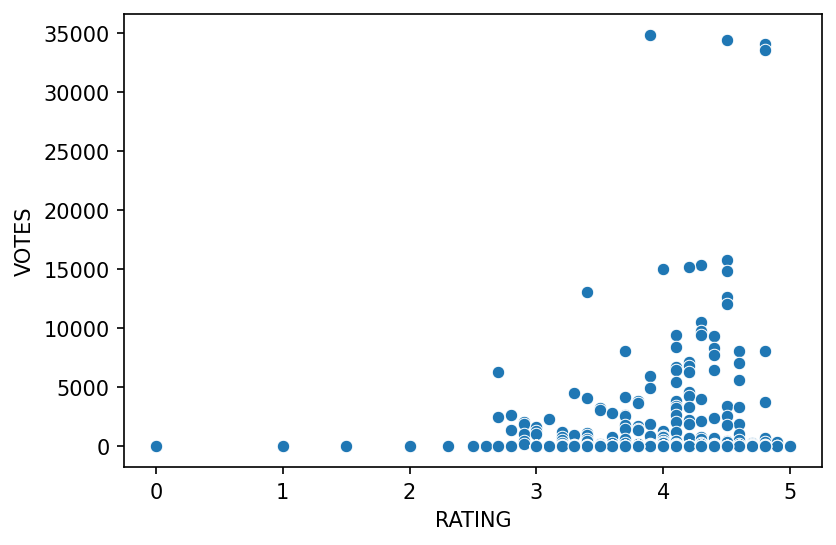

In [7]:
plt.figure(dpi=150)
sns.scatterplot(data=fandango, x='RATING', y='VOTES');

**Calculate the correlation between the columns - we see no correlation between the amount of votes and the popularity**

In [8]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Let's see how many movies there is per year.**

**Creating a new column containing the year of the movie: YEAR**


In [9]:
import re
def extract_year(s):
  str = s.split()[-1]
  str = re.sub('[()]', '', str)
  return int(str)

fandango['YEAR'] = fandango['FILM'].apply(extract_year)

In [10]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

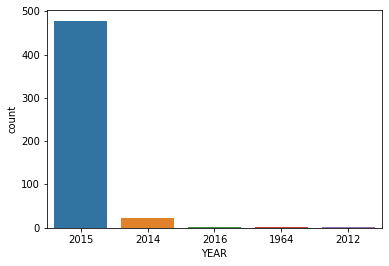

In [13]:
sns.countplot(data=fandango, x='YEAR', order=fandango['YEAR'].value_counts().index);

**10 most voted films:**

In [14]:
fandango.nlargest(10, columns='VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Films without any review:**


In [19]:
(fandango['VOTES'].isnull() | fandango['VOTES']==0).sum()

69

**Deleting not rated movies.**

In [20]:
df = fandango[fandango['VOTES'] > 0]
len(df)

435

----

**As described in the article, the real rating of a movie from users can be different from the displayed stars. Let's see this difference graphically.**

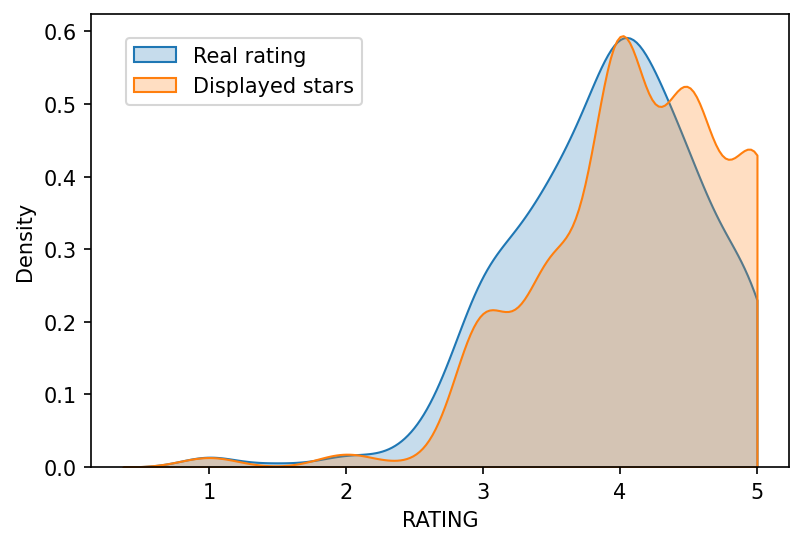

In [21]:
plt.figure(dpi=150)
sns.kdeplot(data=df, x='RATING', shade=True, label='Real rating', clip=[0,5])
sns.kdeplot(data=df, x='STARS', shade=True, label="Displayed stars", clip=[0,5])
plt.legend(loc=(.05,.8));

**Let's quantify this difference.**

**Creating a new column containing the gap between STARS and RATING.**

In [22]:
df['STARS_DIFF'] = round(df['STARS']-df['RATING'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Visualize the gap with a countplot**

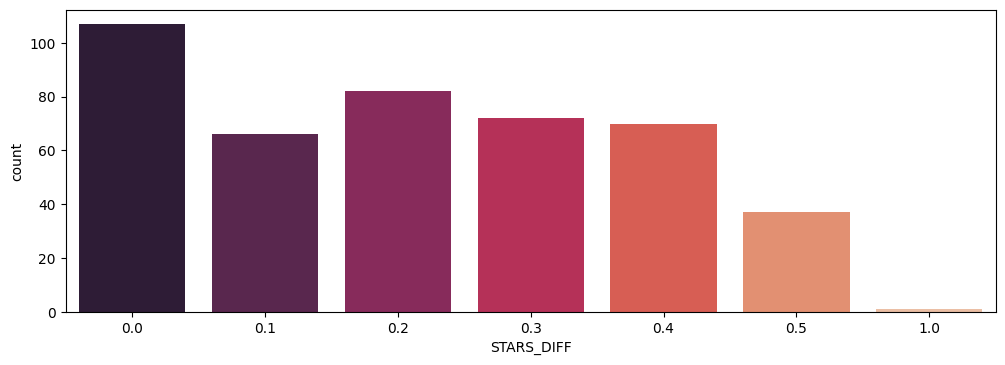

In [24]:
plt.figure(figsize=(12,4), dpi=100)
sns.countplot(data=df, x="STARS_DIFF", palette='rocket');

**We can see that a movie was upgrated by a whole star! Which movie?**

In [26]:
df[df['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part 3 : Comparing the ratings in Fandago and in other sites

**Let's now compare the ratings in fandango site with those of other sites.**

### Rotten Tomatoes

**Creating a scatterplot between Rotten Tomatoes professional critics rating and the users ones.**

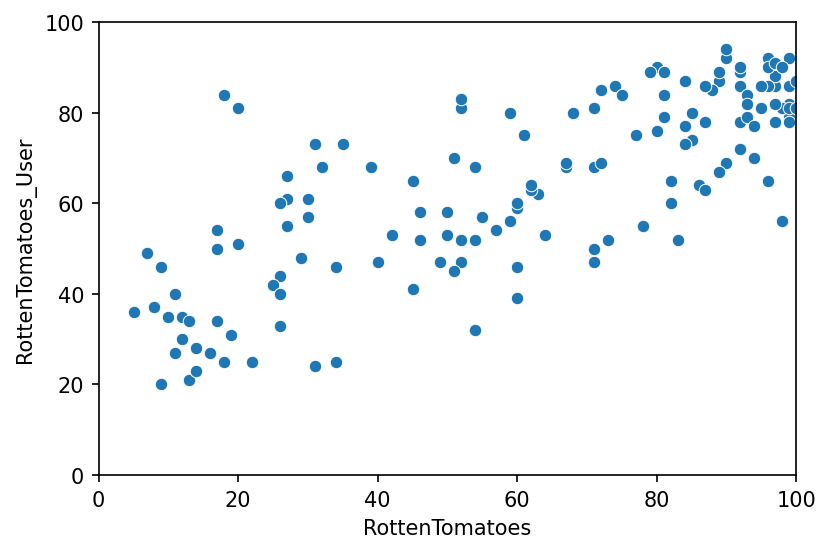

In [31]:
plt.figure(dpi=150)
plt.xlim([0,100])
plt.ylim([0,100])
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User');

**Creating a new column for the difference between critics and users ratings in Rotten Tomatoes. Positive value means critics rating is greater than the users one.**

In [32]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Comparons maintenant la différence moyenne globale. Puisque nous avons affaire à des différences qui peuvent être négatives ou positives, prenez d'abord la valeur absolue de toutes les différences, puis prenez la moyenne. Cela retournera la moyenne des valeurs absolues de la différence entre la note des critiques et la note des utilisateurs.

**Calculate the mean of the absolute value of the gaps.**

In [ ]:
np.abs(all_sites['Rotten_Diff']).mean()

15.095890410958905

**Visualizing the distribution of the gaps.**

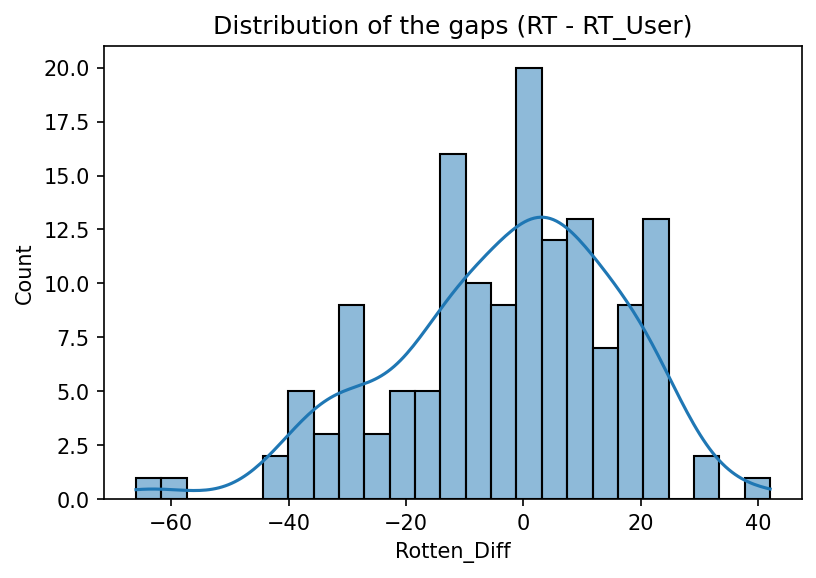

In [33]:
plt.figure(dpi=150)
sns.histplot(data=all_sites, x='Rotten_Diff', bins=25, kde=True)
plt.title("Distribution of the gaps (RT - RT_User)");

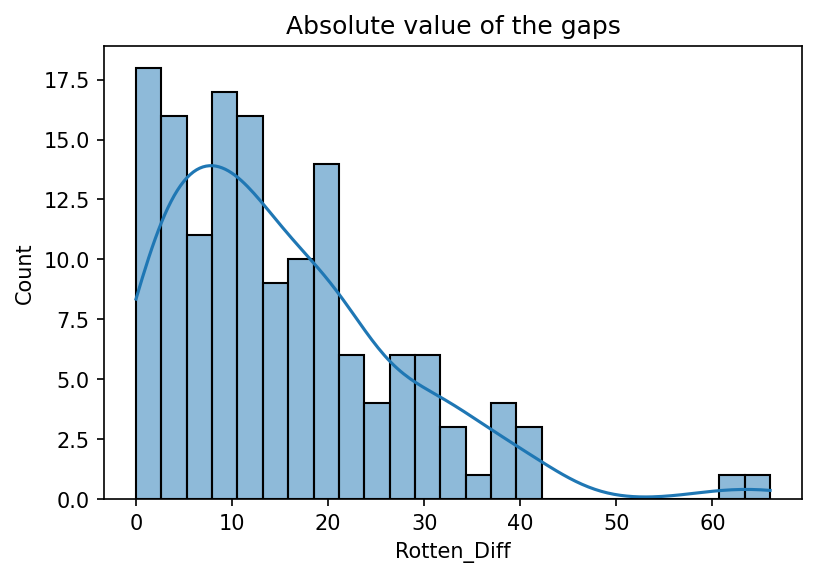

In [35]:
plt.figure(dpi=150)
sns.histplot(data=np.abs(all_sites['Rotten_Diff']), bins=25, kde=True)
plt.title("Absolute value of the gaps");

**Let's see which films have the greatest gaps.**

**First, the 5 with a higher critic rating (most positive gaps) and then with a higher user rating (most negative gaps).**

In [36]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [37]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [38]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### MetaCritic

**Notice the scale of user rating (0-10) is different from the critic ratings (0-100).**

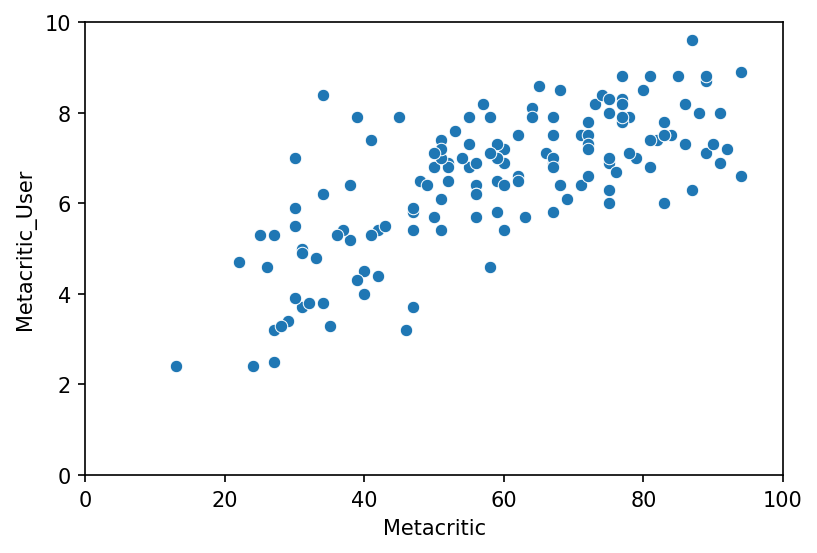

In [39]:
plt.figure(dpi=150)
plt.xlim([0,100])
plt.ylim([0,10])
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User');

### IMDb

**Notice that the votes amount for each film is available in Metacritic and IMDb. Let's see the relation between them.**

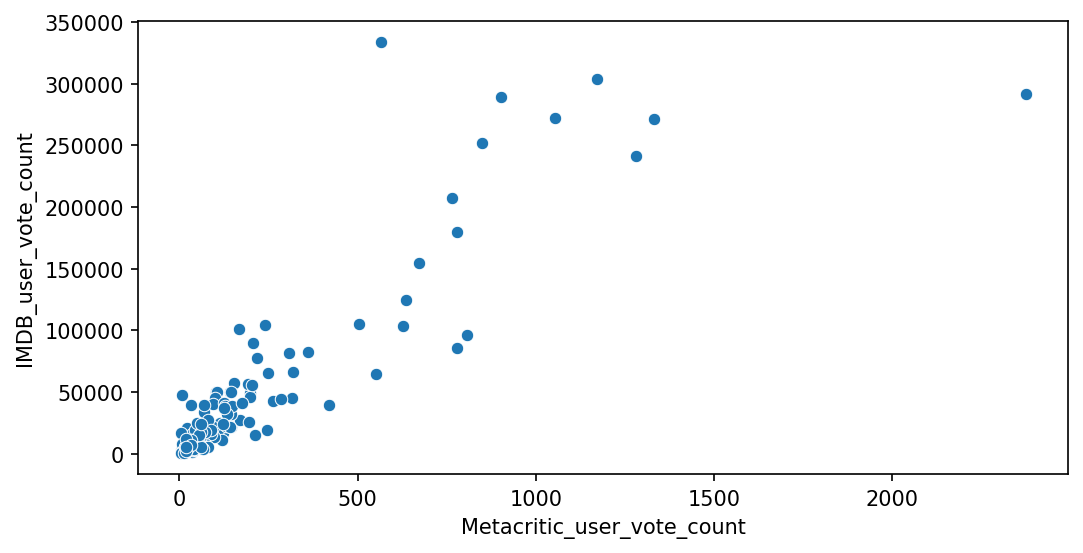

In [41]:
plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(data=all_sites, y='IMDB_user_vote_count', x='Metacritic_user_vote_count');

**Remark there is 2 outliers. The most valued movie in IMDb received only 500 reviewing in Metacritic:**

In [42]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Most valuated film by Metacritic users:**

In [43]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### Comparing Fandango and other sites

**Finally, compare Fandango rating with other sites in order to verify if Fandango fakely increases his ratings to sell more tickets.**

**Operating an inner join between the 2 DataFrames**

In [44]:
df = pd.merge(fandango,all_sites,how='inner',on='FILM')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int64  
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(8), object(1)


In [46]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalizing rating scales to [0-5]

RT critics: [0-100] (divide by 20)

RT users: [0-100] (divide by 20)

Meta critics: [0-10] (divide by 2)

Meta users: [0-10] (divide by 2)

IMDb: [0-10] (divide by 2)

In [47]:
df[['RT_Norm','RTU_Norm','Meta_Norm']] = round(df[['RottenTomatoes','RottenTomatoes_User','Metacritic']]/20,1)
df[['Meta_U_Norm','IMDB_Norm']] = round(df[['Metacritic_User','IMDB']]/2,1)

In [48]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Creating a new dataFrame with only normalized ratings.**

In [49]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [50]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparison of the distribution of the ratings in each site

**Moment of truth!**

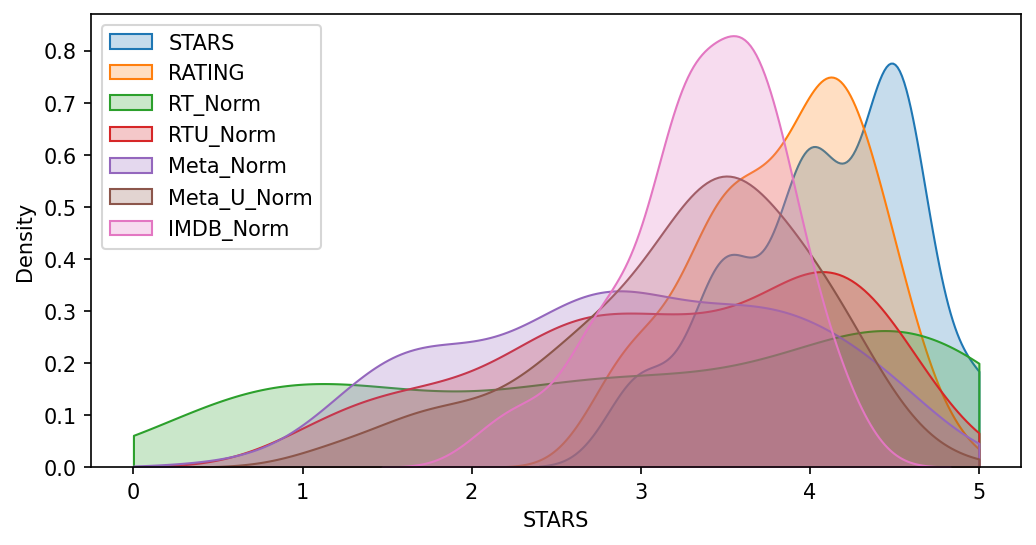

In [51]:
plt.figure(figsize=(8,4),dpi=150)
for col in norm_scores.columns:
  sns.kdeplot(data = norm_scores, x=col, shade=True, label=col, clip=[0,5])
plt.legend(loc=2);

**It clearly appears that the distribution of ratings in Fandango is uneven. Also seems that the most uniform distribution is the Rottem Tomatoes critics one.**

**Let's compare those 2 in a diagram.**

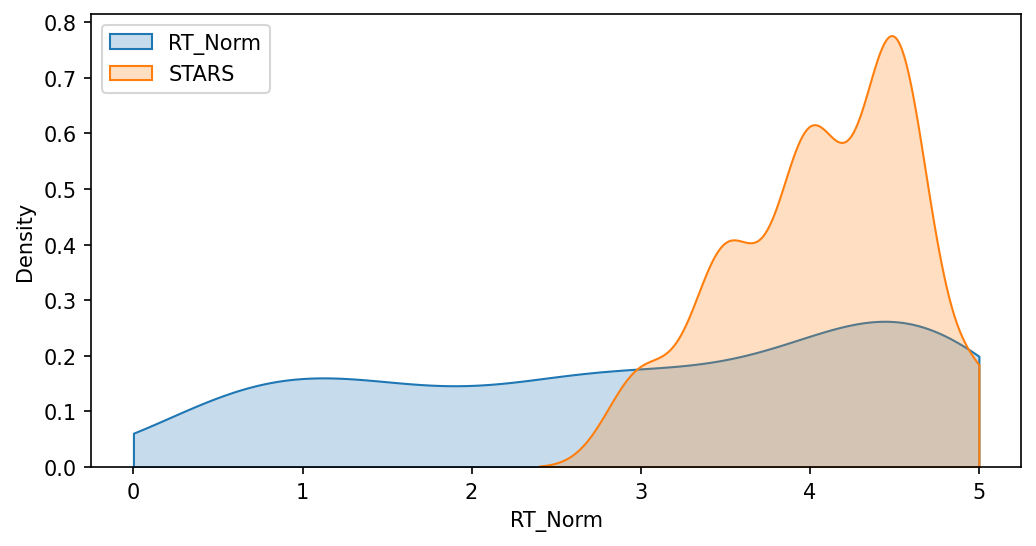

In [52]:
plt.figure(figsize=(8,4),dpi=150)
for col in ['RT_Norm','STARS']:
  sns.kdeplot(data = norm_scores, x=col, shade=True, label=col, clip=[0,5])
plt.legend(loc=2);

**Creating an histogram of all the normalised ratings.**

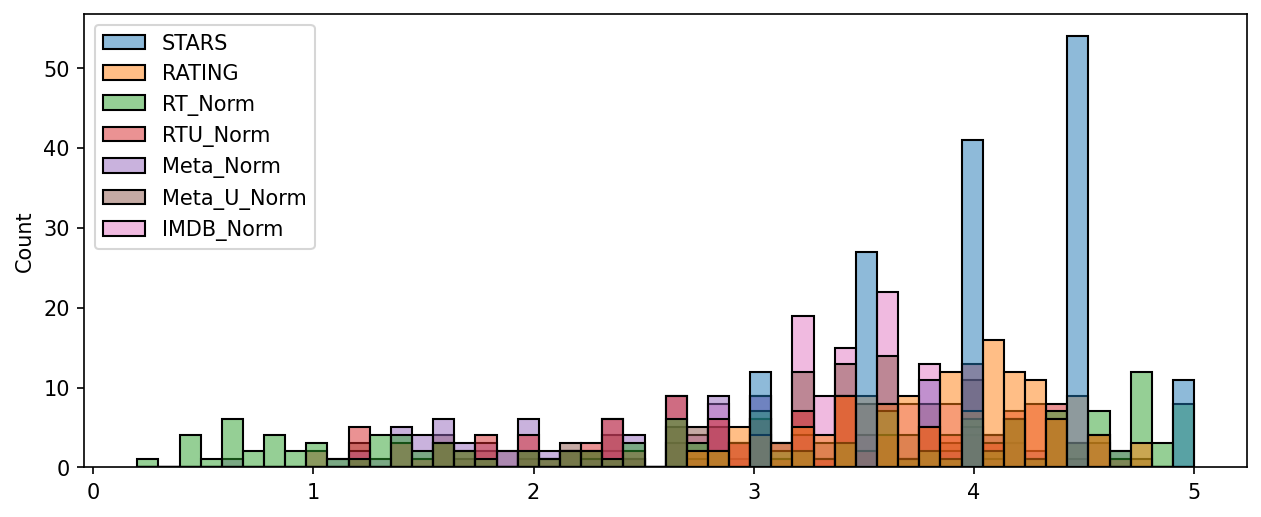

In [55]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=norm_scores, bins=50);

### Worst movies in all the sites

**Creating a clustermap of all the normalized ratings.**

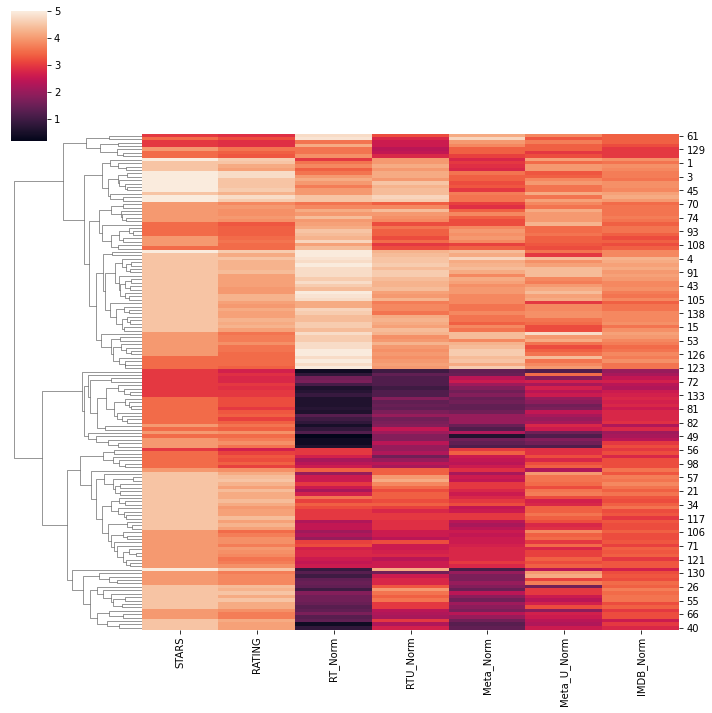

In [56]:
sns.clustermap(data=norm_scores, col_cluster=False);

**Fandango clearly overrates the films. Let's examinate the top 10 worst movies (based on Rotten Tomatoes critics).**

In [58]:
norm_scores = df[['FILM','STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [62]:
norm_scores.nsmallest(10,'RT_Norm')

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


**Visualizing the distribution of the ratings of those 10 films.**

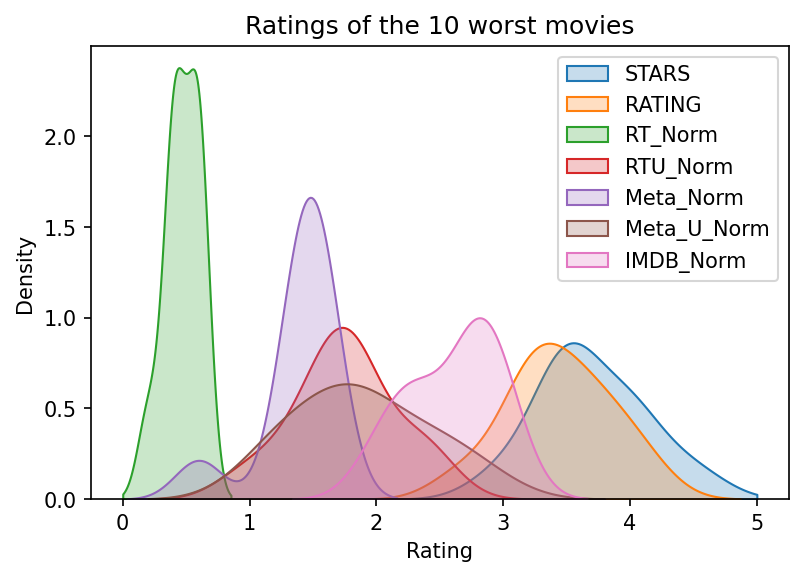

In [66]:
plt.figure(dpi=150)
for col in norm_scores.columns[1:]:
  sns.kdeplot(data=norm_scores.nsmallest(10,'RT_Norm'), x=col, shade=True, label=col, clip=[0,5])
plt.title("Ratings of the 10 worst movies")
plt.xlabel("Rating")
plt.legend()
plt.show()